<h1>Data Preparation</h1><h2 align="center">Missing Values Imputation</h2>

Dataset nr records=100000 nr variables=38


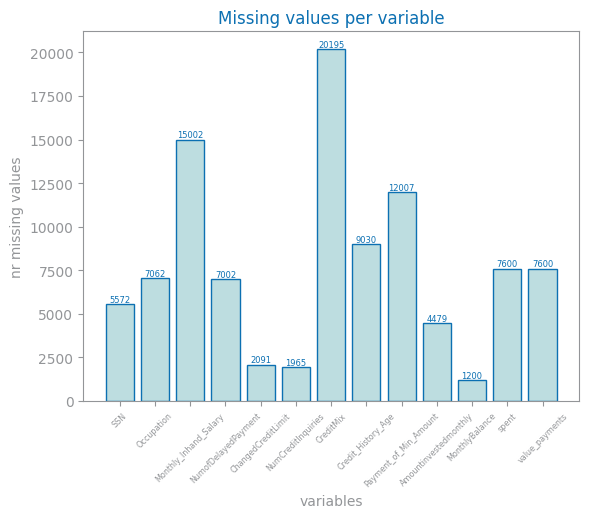

In [145]:
from pandas import read_csv, DataFrame
from matplotlib.pyplot import figure, show
from dslabs_functions import plot_bar_chart

# filepath = "../../../data/class_pos_covid_encoded.csv"
# output_file = "class_pos_covid_encoded_filled"
# file_tag = "health"
# target = "CovidPos"

filepath = "../../../data/class_credit_score_encoded.csv"
output_file = "class_credit_score_encoded_filled"
file_tag = "service"
target = "Credit_Score"

method = 'frequency'
data: DataFrame = read_csv(filepath, na_values="")
print(f"Dataset nr records={data.shape[0]}", f"nr variables={data.shape[1]}")

mv: dict[str, int] = {}
figure()
for var in data:
    nr: int = data[var].isna().sum()
    if nr > 0:
        mv[var] = nr

plot_bar_chart(
    list(mv.keys()),
    list(mv.values()),
    title="Missing values per variable",
    xlabel="variables",
    ylabel="nr missing values",
)
show()

In [146]:
from matplotlib.pyplot import savefig, show
from dslabs_functions import get_variable_types
from numpy import ndarray
from matplotlib.figure import Figure
from matplotlib.pyplot import savefig, show, subplots
from dslabs_functions import define_grid, HEIGHT
from pandas import Series
from matplotlib.pyplot import figure, savefig, show
from dslabs_functions import plot_multibar_chart
from dslabs_functions import set_chart_labels

import json



def print_boxplot(data, state_of_data):
    rows, cols = data.shape
    variables_types: dict[str, list] = get_variable_types(data)
    numeric: list[str] = variables_types["numeric"]
    variables_types
    if [] != numeric:
        rows: int
        cols: int
        rows, cols = define_grid(len(numeric))
        fig: Figure
        axs: ndarray
        fig, axs = subplots(
            rows, cols, figsize=(cols * HEIGHT, rows * HEIGHT), squeeze=False
        )
        i, j = 0, 0
        for n in range(len(numeric)):
            axs[i, j].set_title("Boxplot for %s" % numeric[n])
            axs[i, j].boxplot(data[numeric[n]].dropna().values)
            i, j = (i + 1, 0) if (n + 1) % cols == 0 else (i, j + 1)
        savefig(f"images/{file_tag}_{state_of_data}_boxplots.png", bbox_inches='tight')
        show()
    else:
        print("There are no numeric variables.")

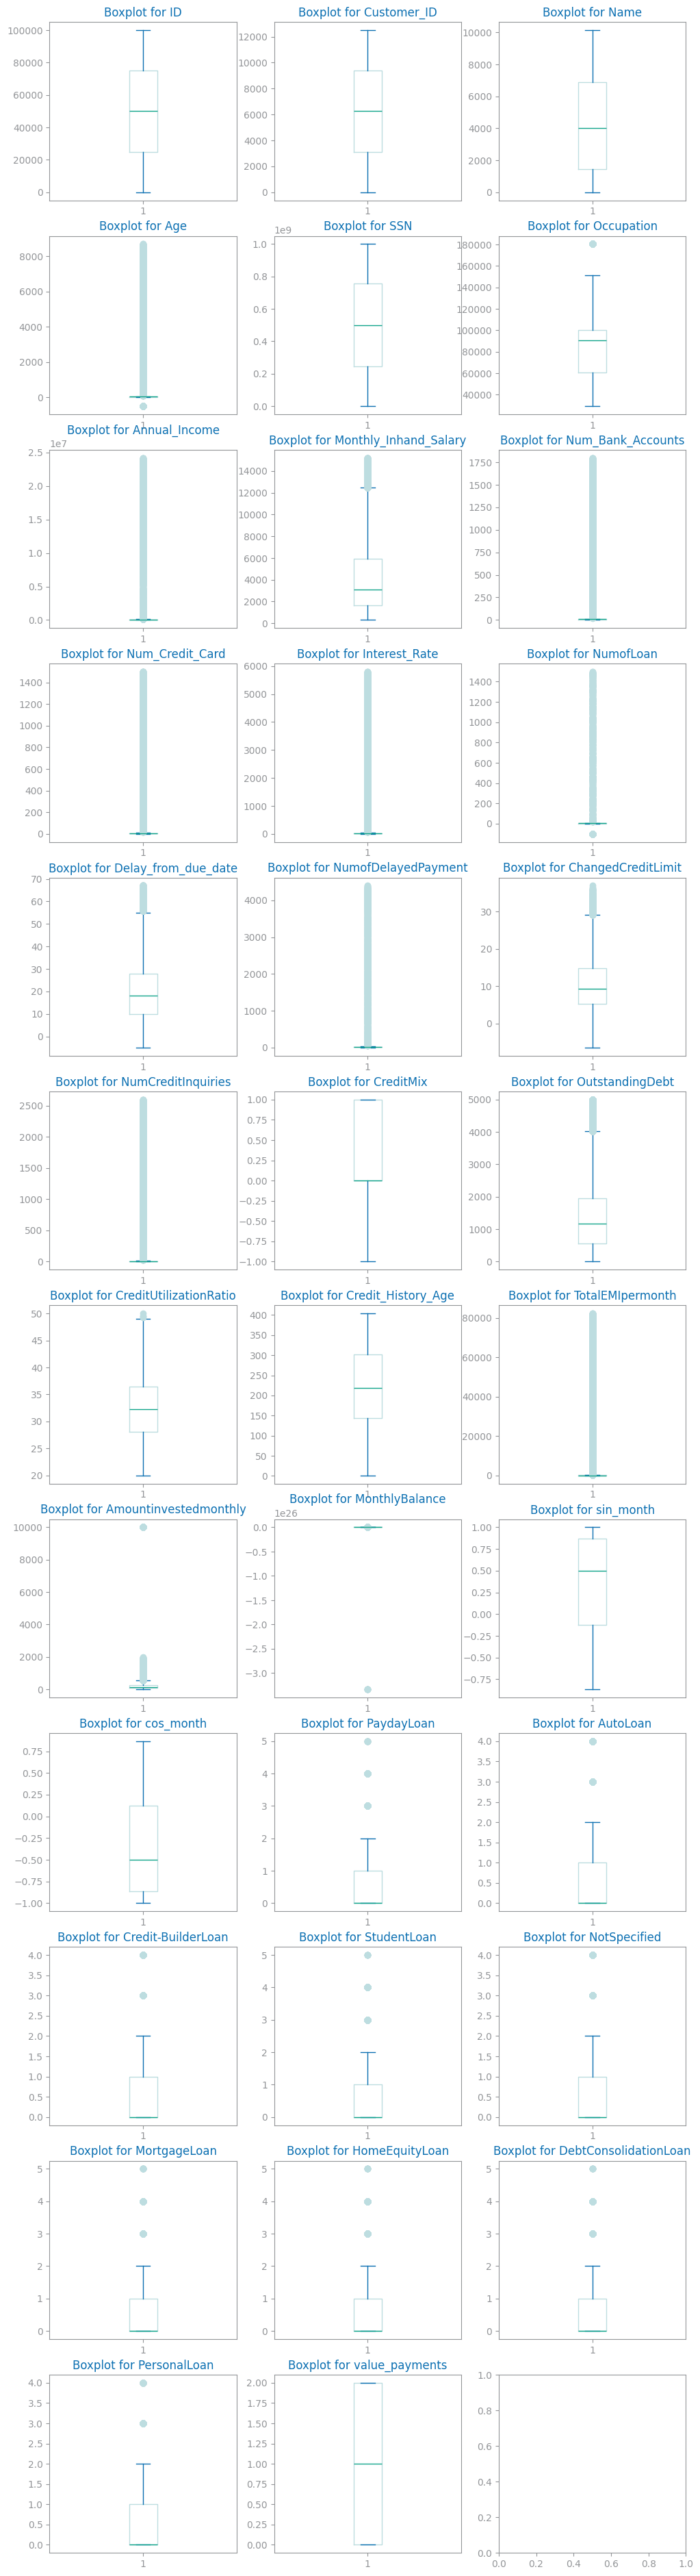

In [147]:
print_boxplot(data=data, state_of_data='before_inputation')

<h3>Dropping Missing Values</h3>

In [148]:
df = data
print(df.shape)

(100000, 38)


In [149]:
def mvi_by_dropping(
    data: DataFrame, min_pct_per_var: float = 0.1, min_pct_per_rec: float = 0.0
) -> DataFrame:
    # Deleting variables
    df: DataFrame = data.dropna(
        axis=1, thresh=data.shape[0] * min_pct_per_var, inplace=False
    )
    # Deleting records
    df.dropna(axis=0, thresh=data.shape[1] * min_pct_per_rec, inplace=True)

    return df


df: DataFrame = mvi_by_dropping(data, min_pct_per_var=0.1, min_pct_per_rec=0.1)
print(df.shape)

(100000, 38)


Note: there is no row with less than 10% of data

<h3>Filling missing values </h3>

In [150]:
from numpy import ndarray
from pandas import concat
from sklearn.impute import SimpleImputer, KNNImputer
from dslabs_functions import get_variable_types, mvi_by_filling


def mvi_by_filling(data: DataFrame, strategy: str = "frequent") -> DataFrame:
    df: DataFrame

    with open(f'variables_types_{file_tag}.json') as json_file:
        variables = json.load(json_file)
 
    stg_num, v_num = "mean", -1
    stg_sym, v_sym = "most_frequent", "NA"
    stg_bool, v_bool = "most_frequent", False
    if strategy != "knn":
        lst_dfs: list = []
        if strategy == "constant":
            stg_num, stg_sym, stg_bool = "constant", "constant", "constant"
        if len(variables["numeric"]) > 0:
            imp = SimpleImputer(strategy=stg_num, fill_value=v_num, copy=True)
            tmp_nr = DataFrame(
                imp.fit_transform(data[variables["numeric"]]),
                columns=variables["numeric"],
            )
            lst_dfs.append(tmp_nr)
        if len(variables["symbolic"]) > 0:
            imp = SimpleImputer(strategy=stg_sym, fill_value=v_sym, copy=True)
            tmp_sb = DataFrame(
                imp.fit_transform(data[variables["symbolic"]]),
                columns=variables["symbolic"],
            )
            lst_dfs.append(tmp_sb)
        if len(variables["binary"]) > 0:
            imp = SimpleImputer(strategy=stg_bool, fill_value=v_bool, copy=True)
            tmp_bool = DataFrame(
                imp.fit_transform(data[variables["binary"]]),
                columns=variables["binary"],
            )
            lst_dfs.append(tmp_bool)
        df = concat(lst_dfs, axis=1)
    else:
        imp = KNNImputer(n_neighbors=5)
        imp.fit(data)
        ar: ndarray = imp.transform(data)
        df = DataFrame(ar, columns=data.columns, index=data.index)
    return df


df: DataFrame = mvi_by_filling(data, strategy=method)
df.head(10)

,ID,Customer_ID,Name,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,MortgageLoan,HomeEquityLoan,DebtConsolidationLoan,PersonalLoan,CreditMix,Credit_History_Age,value_payments,Payment_of_Min_Amount,Credit_Score,spent
0,1.0,1.0,1.0,49.0,81349.0,65937.12,5465.76000,5.0,5.0,12.0,...,0.0,0.0,0.0,0.0,0.0,393.0,1.0,0.0,1.0,1.0
1,2.0,1.0,1.0,49.0,81349.0,65937.12,5465.76000,5.0,5.0,4430.0,...,0.0,0.0,0.0,0.0,1.0,392.0,0.0,0.0,1.0,1.0
2,3.0,1.0,1.0,49.0,81349.0,65937.12,5465.76000,5.0,5.0,12.0,...,0.0,0.0,0.0,0.0,1.0,389.0,2.0,0.0,1.0,1.0
3,4.0,1.0,1.0,49.0,81349.0,65937.12,5465.76000,5.0,443.0,12.0,...,0.0,0.0,0.0,0.0,1.0,388.0,2.0,0.0,1.0,0.0
4,5.0,1.0,1.0,49.0,81349.0,65937.12,5465.76000,5.0,5.0,12.0,...,0.0,0.0,0.0,0.0,1.0,387.0,0.0,0.0,1.0,0.0
5,6.0,1.0,1.0,49.0,81349.0,65937.12,5465.76000,5.0,5.0,12.0,...,0.0,0.0,0.0,0.0,0.0,386.0,0.0,1.0,1.0,0.0
6,7.0,1.0,0.0,49.0,81349.0,265962.00,4194.17085,5.0,5.0,12.0,...,0.0,0.0,0.0,0.0,1.0,191.0,0.0,0.0,1.0,0.0
7,8.0,1.0,0.0,49.0,81349.0,65937.12,5465.76000,5.0,5.0,12.0,...,0.0,0.0,0.0,0.0,1.0,391.0,2.0,0.0,1.0,1.0
8,9.0,2.0,2.0,43.0,403312.0,44295.54,4194.17085,8.0,6.0,30.0,...,0.0,0.0,0.0,0.0,0.0,148.0,2.0,1.0,0.0,1.0
9,10.0,2.0,2.0,43.0,403312.0,44295.54,3677.29500,8.0,6.0,30.0,...,0.0,0.0,0.0,0.0,0.0,147.0,1.0,1.0,1.0,1.0


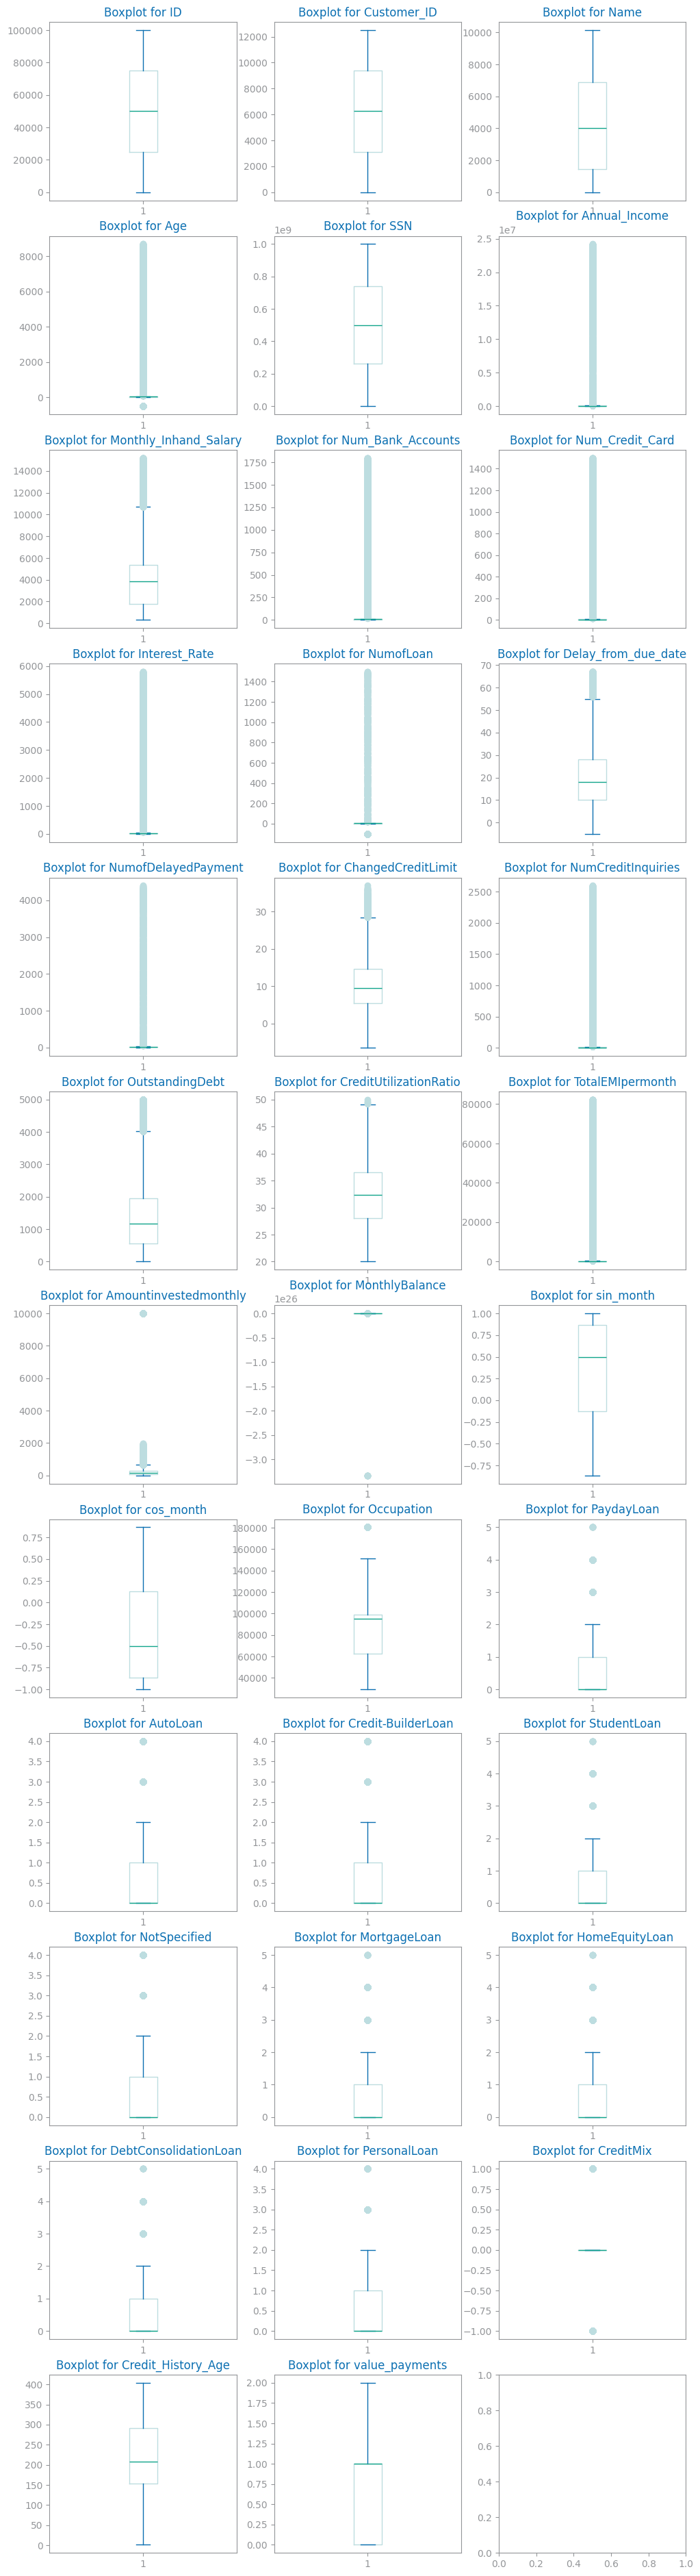

In [151]:
print_boxplot(data=df, state_of_data='after_inputation')

In [152]:
df.to_csv(f"../../../data/{output_file}_{method}.csv", index=False)